# COVID Descriptive Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## Creating Date Variables

In [2]:
today = datetime.date.today()
mon = today.month
day = today.day
year = today.year
 = f'{mon}-{day}-{year}'

In [61]:
day1 = str(df.date.min())[5:10].replace('-','/')
dayi = str(df.date.max())[5:10].replace('-','/')

In [36]:
#converting date to datetime type
df.date = pd.to_datetime(df.date)
df['week'] = df['date'].dt.week

In [37]:
df['day'] = df['date'].dt.day_name()
print(df['day'].head())

0       Monday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: day, dtype: object


In [32]:
qa_path = '../data/QA Checks/'
graphics_path = '../Graphics/'
data_path = '../data/'

In [33]:
df = pd.read_csv(f'{data_path}Final COVID Only Dataset 7-13-2020 (CLEAN).csv', sep=',')

In [34]:
df.columns

Index(['COUNTY', 'AWAITING_TESTING', 'NEGATIVE', 'POSITIVE',
       'PERCENT_POSITIVE', 'TOTAL_TESTED', 'FILE_NAME', 'INCONCLUSIVE', 'DATE',
       'DAY_OF_WEEK', 'NEW_NEGATIVES', 'NEW_CASES'],
      dtype='object')

In [35]:
df.columns = df.columns.str.lower()

In [38]:
d = df.groupby('day').new_cases.agg(['mean','median'])
type(d)

pandas.core.frame.DataFrame

In [39]:
df['new_cases'].describe().to_frame(name='Descriptive Analsysis of Daily Case Counts')


,Descriptive Analsysis of Daily Case Counts
count,10225.000000
mean,27.606357
std,129.898135
min,-49.000000
25%,0.000000
50%,2.000000
75%,9.000000
max,3576.000000


In [40]:
df['total_tested'].describe().to_frame(name='Descriptive Analsysis of Total Tests Completed')

,Descriptive Analsysis of Total Tests Completed
count,10293.000000
mean,10368.242592
std,29143.664789
min,1.000000
25%,266.000000
50%,1621.000000
75%,6677.000000
max,434159.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Data columns (total 14 columns):
county              10293 non-null object
awaiting_testing    10293 non-null float64
negative            10293 non-null int64
positive            10293 non-null float64
percent_positive    10293 non-null float64
total_tested        10293 non-null float64
file_name           10293 non-null object
inconclusive        10293 non-null float64
date                10293 non-null datetime64[ns]
day_of_week         10293 non-null int64
new_negatives       10225 non-null float64
new_cases           10225 non-null float64
week                10293 non-null int64
day                 10293 non-null object
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usage: 1.1+ MB


> *Style options for seaborn*

In [24]:
# sns.distplot(df['new_cases'], label='dfdf')
# plt.title('Distribution of New COVID Case Data')
# plt.tight_layout()
# plt.savefig(f'{graphics_path}Distribution of New Case Data ({date_today}).png')

In [14]:
new_case = pd.DataFrame(df.groupby('county').new_cases.agg(['mean','min','max', 'count']))
new_case_dt = pd.DataFrame(df.groupby('date').new_cases.agg(['mean','min','max', 'count']))
new_case.sort_values(by='mean' , inplace = True, ascending=False)

In [15]:
new_case['mean'].head(10).to_frame(name='Top 10 Average Number of New Cases')

,Top 10 Average Number of New Cases
county,
Dade,448.264901
Broward,208.192053
Palm Beach,144.350993
Hillsborough,131.271523
Orange,125.384106
Duval,88.509934
Pinellas,75.748344
Lee,68.463576
Polk,50.529801


In [16]:
new_case['mean'].tail(10).to_frame(name='Bottom 10 Average Number of New Cases')

,Bottom 10 Average Number of New Cases
county,
Taylor,0.966216
Bradford,0.953642
Gilchrist,0.953333
Wakulla,0.925676
Dixie,0.774834
Union,0.754967
Gulf,0.649007
Jefferson,0.587838
Lafayette,0.370861


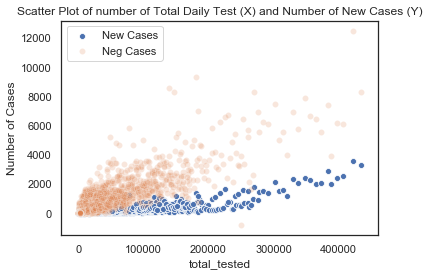

In [17]:
sns.set(style='white')
nc = sns.scatterplot(x='total_tested',  y= 'new_cases', data= df, label = 'New Cases')
sns.scatterplot(x='total_tested',  y= 'new_negatives', data= df, alpha=.2 ,ax=nc, label = 'Neg Cases')
plt.title('Scatter Plot of number of Total Daily Test (X) and Number of New Cases (Y)')
plt.tight_layout()
plt.ylabel('Number of Cases')
plt.savefig(f'{graphics_path}Cases & Neg By Tests Completed 2({date_today}).png')



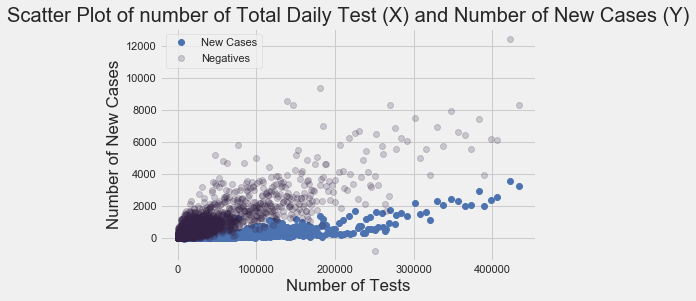

In [18]:
plt.style.use('fivethirtyeight')
plt.plot(df['total_tested'],df['new_cases'],'bo', label='New Cases')
plt.plot(df['total_tested'],df['new_negatives'], color='#332244',marker='o', linestyle='' , label= 'Negatives', alpha=0.2)
plt.title('Scatter Plot of number of Total Daily Test (X) and Number of New Cases (Y)')
plt.xlabel('Number of Tests')
plt.ylabel('Number of New Cases')
plt.savefig(f'{graphics_path}Cases & Neg By Tests Completed ({date_today}).png')
plt.legend()

plt.show()

Text(2.1199999999999974, 0.5, 'Number of New Cases')

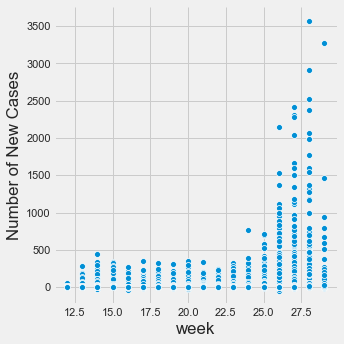

In [19]:
sns.relplot(x='week',  y= 'new_cases', data= df)
plt.ylabel('Number of New Cases')

In [20]:

new_case_dt

,mean,min,max,count
date,,,,
2020-03-16,NaN,NaN,NaN,0
2020-03-18,2.701754,0.0,51.0,57
2020-03-19,1.310345,0.0,16.0,58
2020-03-20,2.982759,0.0,37.0,58
2020-03-21,3.030303,0.0,46.0,66
2020-03-22,1.848485,-1.0,51.0,132
2020-03-23,1.666667,-1.0,41.0,132
2020-03-24,1.791045,0.0,60.0,134
2020-03-25,3.750000,0.0,91.0,136


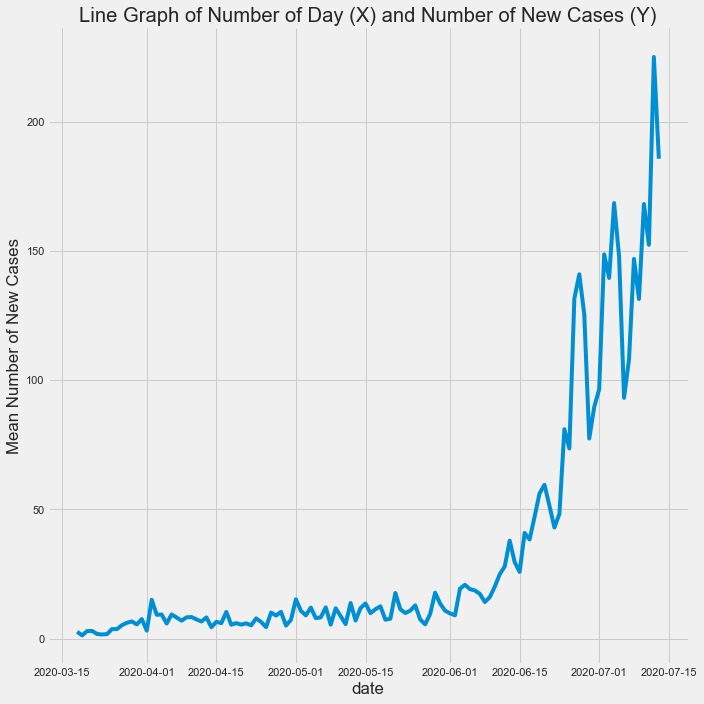

In [42]:
new_case_dt['date'] = new_case_dt.index
sns.relplot(x='date',  y= 'mean',kind= 'line', height=10, aspect=1, data= new_case_dt )
plt.title('Line Graph of Number of Day (X) and Number of New Cases (Y)')
plt.ylabel('Mean Number of New Cases')
plt.tight_layout()
plt.savefig(f'{graphics_path}Line Cases on Day ({date_today}).png')


In [1]:
sns.relplot(x='week',  y= 'new_cases',kind= 'line', height=10, aspect=1, data= df )
plt.title('Line Graph of number of Week (X) and Number of New Cases (Y)')
plt.tight_layout()
plt.ylabel('Mean Number of New Cases')
plt.savefig(f'{graphics_path}Line Cases on Week ({date_today}).png')

NameError: name 'sns' is not defined

In [2]:
sns.relplot(x='date',  y= 'mean',kind= 'line', height=10, aspect=1, data= new_case_dt )
plt.title('Line Graph of Number of Day (X) and Number of New Cases (Y)')
plt.ylabel('Mean Number of New Cases')
plt.tight_layout()
plt.savefig(f'{graphics_path}Line Cases on Day ({date_today}).png')

NameError: name 'sns' is not defined

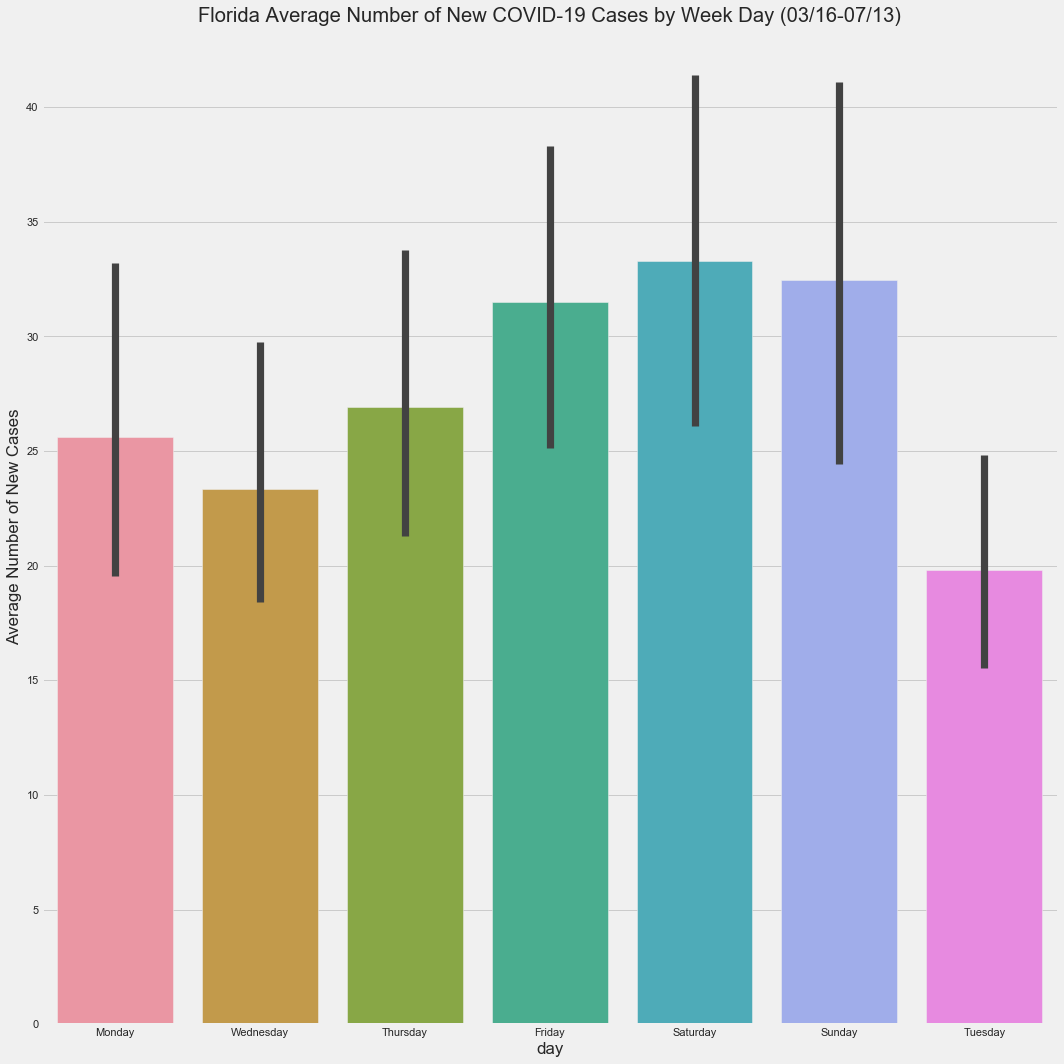

In [62]:
# Mess with this table to see if you can adjust the order of the week. 
sns.catplot(x ='day', y='new_cases', kind = 'bar' ,data =df ,height=15)
plt.title(f'Florida Average Number of New COVID-19 Cases by Week Day ({day1}-{dayi})' )
plt.tight_layout()
plt.ylabel('Average Number of New Cases')
plt.savefig(f'{graphics_path}Bar Graph Day of Week & New Cases ({date_today}).png')

In [ ]:
# v = sns.catplot(x ='day', y='new_cases', kind = 'violin', inner = None, data= df)
# sns.swarmplot(x ='day', y='new_cases',color='k', size= 3, data=df, ax=v.ax)

In [ ]:
sns.relplot(x='total_tested',  y= 'new_cases', hue='day',height=10,data= df)
plt.title('Scatter Plot of Number of New Cases on Number of Tests Completed')
plt.ylabel('Number of New Cases')
plt.tight_layout()
plt.savefig(f'{graphics_path} Scatter Plot by Day ({date_today}).png')

# Information and Reference

In [ ]:
sns.relplot(x='week',  y= 'new_cases',kind= 'line', data= df , ci = 'sd')

In [ ]:
sns.relplot(x='total_tested',  y= 'new_cases', data= df, hue = 'date')

In [ ]:
sns.set(style='white')
sns.relplot(x='total_tested',  y= 'new_cases', data= df, hue = 'county')

In [ ]:
dir(sns)

In [ ]:
dir(pd)

# The diffrent methods available in the Pandas Datetime type

In [ ]:
dir(df['date'].dt)

In [ ]:
dir(plt)

> *Style options for matplotlib*

In [ ]:
plt.style.available

# Exporting COVID Dataset After New Desciptive Analysis Vars 

In [31]:
df.to_csv(f'{data_path}COVID Data Set Only (Final) {date_today}.csv' , sep = ',', index=False)
new_case.to_csv(f'{data_path}Descriptive Analysis Cases by County {date_today}.csv', sep=',', index=False)